<a href="https://colab.research.google.com/github/Youssefsalem3/CodeClause_Customer-Segment-Prediction./blob/main/customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer segment prediction
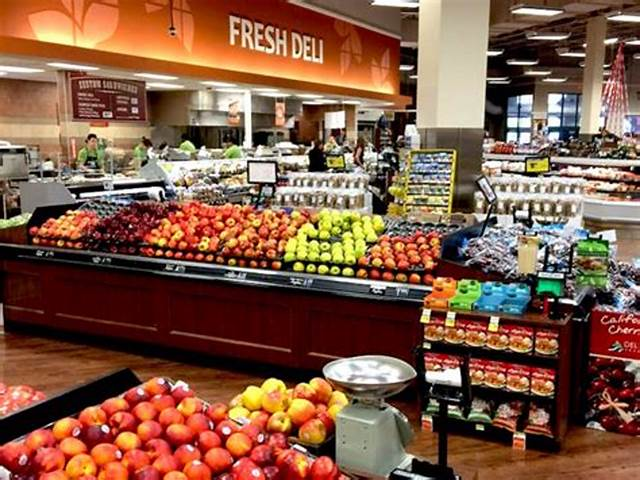

**1-importing the libraries needed**


In [1]:
#For the data
import pandas as pd
import numpy as np
#For the analysis and plots 
import matplotlib.pyplot as plt
import seaborn as sns
#For clustering 
from sklearn.cluster import KMeans
#To ignore warnings 
import warnings
warnings.filterwarnings("ignore")

**2-Reading the data**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Youssefsalem3/CodeClause_Customer-Segment-Prediction./main/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3-Exploring the data**

In [3]:
data.shape
#so we have 200 cases and 5 different columns or labels which are(customer_id,Gender,Age,Annual Income,Spending score)

(200, 5)

In [4]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Checking for missing values 
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#more into the data statstics
data.describe()
#no need for scaling the data here 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#since the customer id is not important we can drop it
data.drop("CustomerID", axis=1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**4-Analysing the data**

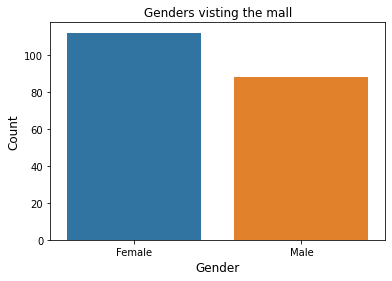

In [8]:
#looking into the genders visting our mall
gender_count = data['Gender'].value_counts(dropna = False)
sns.barplot(gender_count.index, gender_count.values, alpha = 1)
plt.title('Genders visting the mall')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

Clearly more females are visiting the mall.

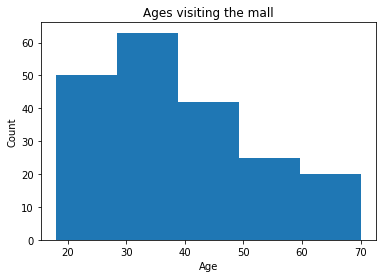

In [9]:
#looking into the ages of the customers
plt.hist(data['Age'], bins=5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages visiting the mall')
plt.show()

most of the customers are aged between 30 to nearly 38


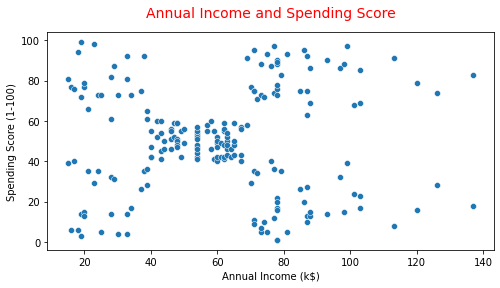

In [10]:
#Annual income and spending score plotting
plt.figure(figsize=(8,4))
sns.scatterplot(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'])
plt.title('Annual Income and Spending Score', size=14, pad=15.0, color='Red');

from what we can see annual income is the playing the main role in spending score and we can see that the perfect fit is 5 clusters but let's check it using elbow method

**5-Using Kmean to find the clusters**

5.1-using the elbow method to know the number of clusters we should use

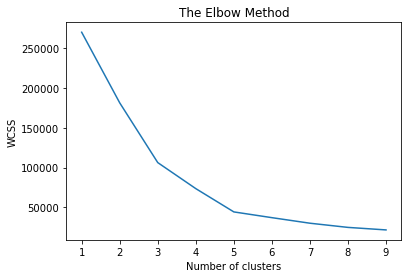

In [11]:
#choosing annual income & spending score
AI_SS= data.iloc[:, [2, 3]].values
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(AI_SS)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we already said there are 5 clusters !! now lets use kmean to see the clusters.

In [12]:
Kmodel = KMeans(n_clusters = 5)
Kmodel.fit(AI_SS)
y_pred = Kmodel.predict(AI_SS)

In [13]:
#getting the centeroids
centroid = Kmodel.cluster_centers_
centroid

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

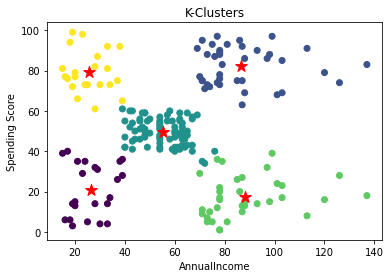

In [14]:
plt.scatter(data.iloc[:,2],data.iloc[:,3],c=y_pred)
plt.scatter(centroid[:,0],centroid[:,1],marker='*',color='red',s=150)
plt.xlabel('AnnualIncome')
plt.ylabel('Spending Score')
plt.title('K-Clusters')
plt.show()

In [15]:
#Adding the clusters to the data frame so that the team easily know the customer cluster
data['Class'] = y_pred
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


**So here are the final insights:**

**1ST:**The blue coloured cluster it shows people with low income yet with high spending scores maybe they just like our mall and they like buying the products we afford, they are not our main target in the mall but they are an important source of income for us,So we need to keep them satisfied.

**2ND:**The yellow coloured cluster it shows people with low income and low spending scores as well this is expected as low salaries means less buying so the mall will not be very intersted in this cluster.

**3RD:**The cyan coloured cluster it shows people with average income and average spending score those are not our target too but we can increase their spending score using more marketing or making surveys to know what they are intersted in so that we can increase their spending score.

**4TH:**The purple coloured cluster it shows people with high income and high spending score they are the main source of profit here they are pleased with what we offer and we should keep them satisfied.

**5TH**:The green coloured cluster it shows the people with high income yet low spending score and they might be our prime target they might not be satisfied with the mall facilities or services we should do more analysis to know what they like to add to our mall ,organizing events or even doing a marketing campaign to attract them into spending more as they have a very huge potential!

**So we need to attract the 3rd and the 5th clusters to increase the income and to keep satisfying the 1st and 4th clusters as they are very important for us**